In [502]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [504]:
# Load dataset 
df = pd.read_csv('C:\\Users\\arosh\\Documents\\internship files\\train_revised.csv')

# Display the DataFrame
print(df)

       ride_id seat_number payment_method payment_receipt travel_date  \
0         1442         15A          Mpesa      UZUEHCBUSO    17-10-17   
1         5437         14A          Mpesa      TIHLBUSGTE    19-11-17   
2         5710          8B          Mpesa      EQX8Q5G19O    26-11-17   
3         5777         19A          Mpesa      SGP18CL0ME    27-11-17   
4         5778         11A          Mpesa      BM97HFRGL9    27-11-17   
...        ...         ...            ...             ...         ...   
51640    13826          9B          Mpesa      8V2XDDZR6V    20-04-18   
51641    13809         18A          Mpesa      4PEBSVJSNK    20-04-18   
51642    13809         17A          Mpesa      LVN64LZDNN    20-04-18   
51643    13796         16B          Mpesa      REYBSKTYWN    20-04-18   
51644    14304           7          Mpesa      AQN7FBUSGP    14-11-17   

      travel_time travel_from travel_to car_type  max_capacity  
0            7:15      Migori   Nairobi      Bus          

In [506]:
# Check for missing values
print(df.isnull().sum())

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64


In [508]:
df.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64

In [510]:
#data cleaning and processing
df['datetime'] = pd.to_datetime(df['travel_date'] + ' ' + df['travel_time'], format= '%d-%m-%y %H:%M')

In [512]:
agg_df = df.groupby('ride_id').agg({
    'seat_number': 'count',
    'travel_from': 'first',
    'car_type': 'first',
    'max_capacity': 'first',
    'datetime': 'first',
}).rename(columns={'seat_number': 'seat_sold'})

In [514]:
agg_df['day_of_week'] = agg_df['datetime'].dt.dayofweek
agg_df['hour'] = agg_df['datetime'].dt.hour
agg_df['month'] = agg_df['datetime'].dt.month

In [516]:
agg_df

,seat_sold,travel_from,car_type,max_capacity,datetime,day_of_week,hour,month
ride_id,,,,,,,,
1442,1,Migori,Bus,49,2017-10-17 07:15:00,1,7,10
5437,1,Migori,Bus,49,2017-11-19 07:12:00,6,7,11
5710,1,Keroka,Bus,49,2017-11-26 07:05:00,6,7,11
5777,5,Homa Bay,Bus,49,2017-11-27 07:10:00,0,7,11
5778,31,Migori,Bus,49,2017-11-27 07:12:00,0,7,11
...,...,...,...,...,...,...,...,...
20113,9,Kisii,shuttle,11,2018-02-07 07:00:00,2,7,2
20114,4,Kisii,Bus,49,2017-12-12 07:10:00,1,7,12
20115,5,Kisii,shuttle,11,2017-12-06 07:10:00,2,7,12


In [518]:
agg_df.nunique()

seat_sold         50
travel_from       17
car_type           2
max_capacity       2
datetime        4579
day_of_week        7
hour               9
month              7
dtype: int64

In [520]:
agg_df.max()

seat_sold                        50
travel_from                    Sori
car_type                    shuttle
max_capacity                     49
datetime        2018-04-20 23:10:00
day_of_week                       6
hour                             23
month                            12
dtype: object

In [522]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6249 entries, 1442 to 20117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   seat_sold     6249 non-null   int64         
 1   travel_from   6249 non-null   object        
 2   car_type      6249 non-null   object        
 3   max_capacity  6249 non-null   int64         
 4   datetime      6249 non-null   datetime64[ns]
 5   day_of_week   6249 non-null   int32         
 6   hour          6249 non-null   int32         
 7   month         6249 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(2)
memory usage: 366.2+ KB


In [524]:
enc= LabelEncoder()
for i in (1,2,4):
    agg_df.iloc[:,i]=enc.fit_transform(agg_df.iloc[:,i])
agg_df

C:\Users\arosh\AppData\Local\Temp\ipykernel_3936\1379213697.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  0   2   3 ... 338  16   4]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  agg_df.iloc[:,i]=enc.fit_transform(agg_df.iloc[:,i])


,seat_sold,travel_from,car_type,max_capacity,datetime,day_of_week,hour,month
ride_id,,,,,,,,
1442,1,9,0,49,0,1,7,10
5437,1,9,0,49,2,6,7,11
5710,1,4,0,49,3,6,7,11
5777,5,1,0,49,16,0,7,11
5778,31,9,0,49,17,0,7,11
...,...,...,...,...,...,...,...,...
20113,9,7,1,11,2288,2,7,2
20114,4,7,0,49,635,1,7,12
20115,5,7,1,11,338,2,7,12


In [526]:
agg_df.corr()

,seat_sold,travel_from,car_type,max_capacity,datetime,day_of_week,hour,month
seat_sold,1.000000,-0.027875,-0.208762,0.208762,0.001411,-0.010743,0.215129,0.009941
travel_from,-0.027875,1.000000,-0.203815,0.203815,0.059469,0.009408,0.153323,-0.046345
car_type,-0.208762,-0.203815,1.000000,-1.000000,-0.239210,-0.001857,-0.070086,0.145790
max_capacity,0.208762,0.203815,-1.000000,1.000000,0.239210,0.001857,0.070086,-0.145790
datetime,0.001411,0.059469,-0.239210,0.239210,1.000000,0.006657,0.029697,-0.635603
day_of_week,-0.010743,0.009408,-0.001857,0.001857,0.006657,1.000000,0.028612,0.024858
hour,0.215129,0.153323,-0.070086,0.070086,0.029697,0.028612,1.000000,0.020627
month,0.009941,-0.046345,0.145790,-0.145790,-0.635603,0.024858,0.020627,1.000000


In [528]:
features = ['travel_from','car_type','max_capacity','day_of_week','hour','month']
target = 'seat_sold'

In [530]:
X=agg_df[features]
y=agg_df[target]

In [532]:
#spliting into train test 
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [534]:
categorical_features = ['travel_from','car_type']
numeric_features = ['max_capacity', 'day_of_week','hour','month']

In [536]:
#category data to numerical
preprocessor = ColumnTransformer(force_int_remainder_cols=False,
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [538]:
#data processing and modeltraining
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=100, random_state=42))
])

In [540]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['travel_from',
                                                   'car_type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [541]:
y_pred= model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

7.134780508863631

In [542]:
(y_test,y_pred)

(ride_id
 8774     11
 6794     11
 10556     8
 8949      3
 12380     4
          ..
 8961     10
 6731      6
 6630     11
 12745    10
 7534      1
 Name: seat_sold, Length: 1250, dtype: int64,
 array([6.845514  , 8.82691748, 8.58045954, ..., 8.59037711, 4.50866667,
        2.97220607]))

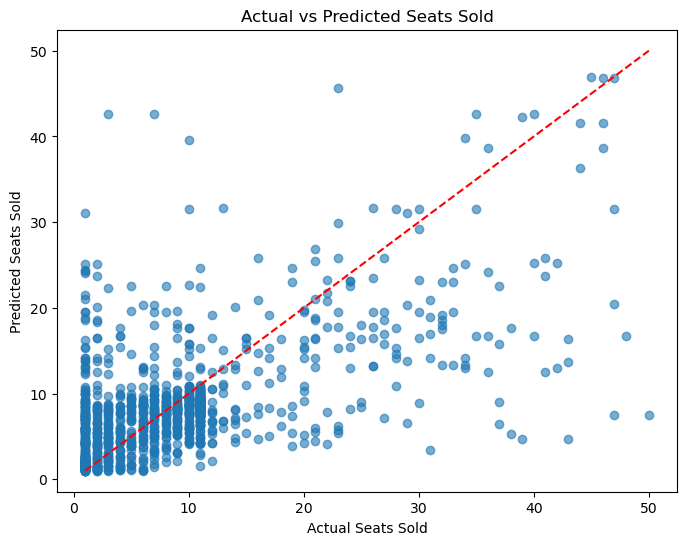

In [554]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Seats Sold")
plt.ylabel("Predicted Seats Sold")
plt.title("Actual vs Predicted Seats Sold")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()